In [7]:
# First let's import the relevant libraries
# from datasets import load_dataset
import pandas as pd
import random


load_questions = False
save_history = False
num_questions = 20
model_path = "models/Llama-3.2-1B-Instruct-Q4_1.gguf"
lora_path =  "models/lora_adapter_q8_0_r_basic_config.gguf"

In [8]:
if load_questions:
    ds = load_dataset("mlabonne/FineTome-100k")
    questions = ds['train']
    indices = random.sample(range(len(questions)),num_questions)
    data = []
    for idx in indices:
        conv = questions[idx]['conversations'][:2]
        if conv is not None:
            data.append(conv)
    df = pd.DataFrame(data)
    df.to_csv('random_questions.csv')
    print(f'Saved {num_questions} questions.')
    


In [9]:
import pandas as pd
import chatbot

# 1. Läs in frågor + referenssvar
df = pd.read_csv("random_questions.csv")
pairs = [(eval(row[1])["value"], eval(row[2])["value"]) for _, row in df.iterrows()]

# 2. Initiera modellen
model_path = "models/Llama-3.2-1B-Instruct-Q4_1.gguf"
lora_path = "models/lora_adapter_q8_0_r_32.gguf"                # byt till LoRA-fil när ni vill testa adaptrar
save_history = False              # False = varje fråga fristående

model = chatbot.LLM_model(model_path, lora_path, save_hist=save_history)

/var/folders/8j/7633yjhn4k36wll68zkkbvsr0000gn/T/ipykernel_82504/2041297488.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pairs = [(eval(row[1])["value"], eval(row[2])["value"]) for _, row in df.iterrows()]
llama_model_load_from_file_impl: using device Metal (Apple M3) - 5455 MiB free
llama_model_loader: loaded meta data with 36 key-value pairs and 147 tensors from models/Llama-3.2-1B-Instruct-Q4_1.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str  

In [10]:
import ast
import pandas as pd
import csv, os, datetime as dt

# ==============================
# 1) Load questions CSV
# ==============================
def load_pairs(path="random_questions.csv"):
    df = pd.read_csv(path)

    Q = []
    for _, row in df.iterrows():
        try:
            m0 = ast.literal_eval(row["0"])
            m1 = ast.literal_eval(row["1"])
        except Exception:
            continue

        if m0.get("from") == "human" and m1.get("from") == "gpt":
            Q.append((m0["value"].strip(), m1["value"].strip()))
    return Q

pairs = load_pairs()
print(f"Loaded {len(pairs)} question-answer pairs.")

Loaded 16 question-answer pairs.


In [11]:
import chatbot
# Init the model
model = chatbot.LLM_model(model_path, lora_path, save_hist=save_history)

model_answers = []

for i, (q, _) in enumerate(pairs, start=1):
    print(f"Generating answer {i}/{len(pairs)}...")
    ans = model.chat_fn(q)    # your LLM call here
    model_answers.append(ans)

print("Done. Generated", len(model_answers), "answers.")

llama_model_load_from_file_impl: using device Metal (Apple M3) - 5455 MiB free
llama_model_loader: loaded meta data with 36 key-value pairs and 147 tensors from models/Llama-3.2-1B-Instruct-Q4_1.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama-3.2-1B-Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = Llama-3.2-1B-Instruct
llama_model_loader: - kv   5:                       general.quantized_by str              = Unsloth
llama_model_loader: - kv   6:                     

Generating answer 1/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =    1084.37 ms /   222 tokens (    4.88 ms per token,   204.73 tokens per second)
llama_perf_context_print:        eval time =    7292.93 ms /   255 runs   (   28.60 ms per token,    34.97 tokens per second)
llama_perf_context_print:       total time =    8502.44 ms /   477 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 20 prompt tokens to eval


Generating answer 2/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     238.83 ms /    20 tokens (   11.94 ms per token,    83.74 tokens per second)
llama_perf_context_print:        eval time =    3794.66 ms /   255 runs   (   14.88 ms per token,    67.20 tokens per second)
llama_perf_context_print:       total time =    4097.53 ms /   275 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 42 prompt tokens to eval


Generating answer 3/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     420.85 ms /    42 tokens (   10.02 ms per token,    99.80 tokens per second)
llama_perf_context_print:        eval time =    3847.36 ms /   255 runs   (   15.09 ms per token,    66.28 tokens per second)
llama_perf_context_print:       total time =    4326.72 ms /   297 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 9 prompt tokens to eval


Generating answer 4/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =      79.68 ms /     9 tokens (    8.85 ms per token,   112.95 tokens per second)
llama_perf_context_print:        eval time =    2708.03 ms /   182 runs   (   14.88 ms per token,    67.21 tokens per second)
llama_perf_context_print:       total time =    2828.63 ms /   191 tokens
llama_perf_context_print:    graphs reused =        175
Llama.generate: 3 prefix-match hit, remaining 36 prompt tokens to eval


Generating answer 5/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     382.11 ms /    36 tokens (   10.61 ms per token,    94.21 tokens per second)
llama_perf_context_print:        eval time =    3838.66 ms /   255 runs   (   15.05 ms per token,    66.43 tokens per second)
llama_perf_context_print:       total time =    4300.62 ms /   291 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 257 prompt tokens to eval


Generating answer 6/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     925.65 ms /   257 tokens (    3.60 ms per token,   277.64 tokens per second)
llama_perf_context_print:        eval time =    3961.54 ms /   255 runs   (   15.54 ms per token,    64.37 tokens per second)
llama_perf_context_print:       total time =    4949.30 ms /   512 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 95 prompt tokens to eval


Generating answer 7/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     449.50 ms /    95 tokens (    4.73 ms per token,   211.35 tokens per second)
llama_perf_context_print:        eval time =    3849.06 ms /   255 runs   (   15.09 ms per token,    66.25 tokens per second)
llama_perf_context_print:       total time =    4357.21 ms /   350 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 96 prompt tokens to eval


Generating answer 8/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     439.04 ms /    96 tokens (    4.57 ms per token,   218.66 tokens per second)
llama_perf_context_print:        eval time =    4130.79 ms /   255 runs   (   16.20 ms per token,    61.73 tokens per second)
llama_perf_context_print:       total time =    4637.37 ms /   351 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 283 prompt tokens to eval


Generating answer 9/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     896.05 ms /   283 tokens (    3.17 ms per token,   315.83 tokens per second)
llama_perf_context_print:        eval time =    4011.37 ms /   255 runs   (   15.73 ms per token,    63.57 tokens per second)
llama_perf_context_print:       total time =    4971.05 ms /   538 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 6 prefix-match hit, remaining 129 prompt tokens to eval


Generating answer 10/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     542.93 ms /   129 tokens (    4.21 ms per token,   237.60 tokens per second)
llama_perf_context_print:        eval time =    3916.92 ms /   255 runs   (   15.36 ms per token,    65.10 tokens per second)
llama_perf_context_print:       total time =    4524.54 ms /   384 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 279 prompt tokens to eval


Generating answer 11/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     810.58 ms /   279 tokens (    2.91 ms per token,   344.20 tokens per second)
llama_perf_context_print:        eval time =    4110.74 ms /   255 runs   (   16.12 ms per token,    62.03 tokens per second)
llama_perf_context_print:       total time =    4984.96 ms /   534 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 326 prompt tokens to eval


Generating answer 12/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     989.43 ms /   326 tokens (    3.04 ms per token,   329.48 tokens per second)
llama_perf_context_print:        eval time =    4106.59 ms /   255 runs   (   16.10 ms per token,    62.10 tokens per second)
llama_perf_context_print:       total time =    5162.59 ms /   581 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 596 prompt tokens to eval


Generating answer 13/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =    2031.40 ms /   596 tokens (    3.41 ms per token,   293.39 tokens per second)
llama_perf_context_print:        eval time =    4192.30 ms /   255 runs   (   16.44 ms per token,    60.83 tokens per second)
llama_perf_context_print:       total time =    6288.17 ms /   851 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 12 prompt tokens to eval


Generating answer 14/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     109.25 ms /    12 tokens (    9.10 ms per token,   109.84 tokens per second)
llama_perf_context_print:        eval time =    4213.98 ms /   255 runs   (   16.53 ms per token,    60.51 tokens per second)
llama_perf_context_print:       total time =    4392.31 ms /   267 tokens
llama_perf_context_print:    graphs reused =        246
Llama.generate: 3 prefix-match hit, remaining 16 prompt tokens to eval


Generating answer 15/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =     137.33 ms /    16 tokens (    8.58 ms per token,   116.51 tokens per second)
llama_perf_context_print:        eval time =    2392.41 ms /   146 runs   (   16.39 ms per token,    61.03 tokens per second)
llama_perf_context_print:       total time =    2565.05 ms /   162 tokens
llama_perf_context_print:    graphs reused =        140
Llama.generate: 3 prefix-match hit, remaining 244 prompt tokens to eval


Generating answer 16/16...


llama_perf_context_print:        load time =    1087.79 ms
llama_perf_context_print: prompt eval time =    1326.81 ms /   244 tokens (    5.44 ms per token,   183.90 tokens per second)
llama_perf_context_print:        eval time =    4415.76 ms /   255 runs   (   17.32 ms per token,    57.75 tokens per second)
llama_perf_context_print:       total time =    5811.86 ms /   499 tokens
llama_perf_context_print:    graphs reused =        246


Done. Generated 16 answers.


In [12]:
import ipywidgets as widgets
from IPython.display import display
import csv, os, datetime as dt

# We assume:
# pairs:         list of (question, truth)
# model_answers: list of model outputs, same length as pairs
assert len(pairs) == len(model_answers), "pairs and model_answers must have same length"

# ---------- Widgets ----------
model_name_widget = widgets.Text(
    value="my_model_v1",
    description="Model:",
    layout=widgets.Layout(width="300px")
)

start_button = widgets.Button(description="Start", button_style="primary")
next_button = widgets.Button(description="Next", button_style="success")

rating_widget = widgets.IntSlider(
    value=3, min=1, max=5, step=1,
    description="Rating (1–5):"
)

info_label = widgets.Label(value="Click Start to begin")

qa_box = widgets.Textarea(
    value="",
    layout=widgets.Layout(width="800px", height="300px"),
    disabled=True
)

# ---------- State ----------
current_index = 0
ratings = []  # list of ints


# ---------- Logic ----------
def show_current():
    """Update qa_box with current question, truth and model answer, or show summary."""
    global current_index, ratings

    if current_index >= len(pairs):
        # Finished: show summary
        if not ratings:
            info_label.value = "No ratings given."
            qa_box.value = ""
            return

        avg = sum(ratings) / len(ratings)
        info_label.value = "Evaluation finished"

        qa_box.value = (
            f"Evaluation finished\n\n"
            f"Model: {model_name_widget.value}\n"
            f"Questions rated: {len(ratings)}\n"
            f"Average score (1–5): {avg:.3f}\n"
        )

        # disable controls
        rating_widget.disabled = True
        next_button.disabled = True

        append_to_history(model_name_widget.value, avg, len(ratings))
        return

    # Still questions left
    q, truth = pairs[current_index]
    ans = model_answers[current_index]

    info_label.value = f"Question {current_index+1}/{len(pairs)}"

    qa_box.value = (
        "QUESTION:\n"
        f"{q}\n\n"
        "GROUND TRUTH:\n"
        f"{truth}\n\n"
        "MODEL ANSWER:\n"
        f"{ans}\n"
    )


def on_start_clicked(_):
    global current_index, ratings
    current_index = 0
    ratings = []
    rating_widget.disabled = False
    next_button.disabled = False
    show_current()


def on_next_clicked(_):
    global current_index, ratings

    if current_index < len(pairs):
        ratings.append(rating_widget.value)
        current_index += 1
        show_current()


def append_to_history(model_name, avg_score, num_q, csv_path="llm_eval_history.csv"):
    exists = os.path.exists(csv_path)
    with open(csv_path, "a", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        if not exists:
            w.writerow(["timestamp", "model_name", "avg_score", "num_questions"])
        w.writerow([
            dt.datetime.now().isoformat(timespec="seconds"),
            model_name,
            f"{avg_score:.3f}",
            num_q
        ])


# ---------- Wire up & display ----------
start_button.on_click(on_start_clicked)
next_button.on_click(on_next_clicked)

ui = widgets.VBox([
    model_name_widget,
    widgets.HBox([start_button, next_button]),
    info_label,
    qa_box,
    rating_widget,
])

display(ui)

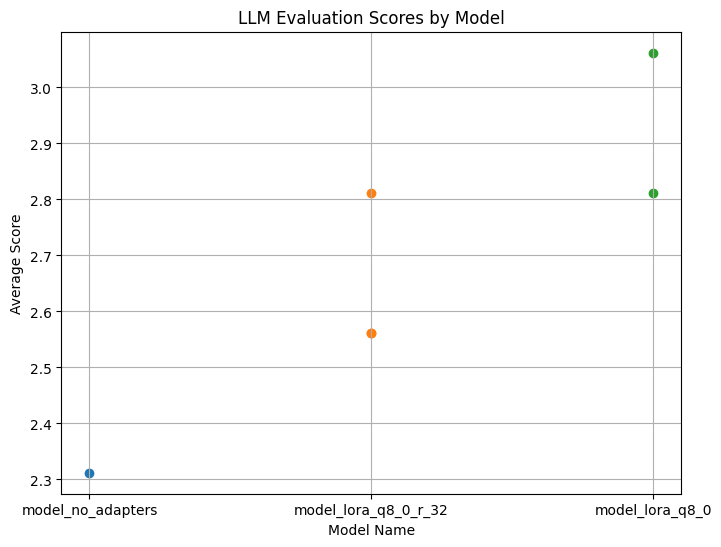

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("llm_eval_history.csv")
model_names = df["model_name"].unique()
plt.figure(figsize=(8,6))
for model in model_names:
    scores = df[df["model_name"] == model]["avg_score"]
    plt.scatter([model]*len(scores), scores, label=model)
plt.xlabel("Model Name")
plt.ylabel("Average Score")
plt.title("LLM Evaluation Scores by Model")
plt.grid(True)
plt.show()